<a href="https://colab.research.google.com/github/jauzammtz/MSIB-K2-KelasAwanPintar/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Membuat DataFrame

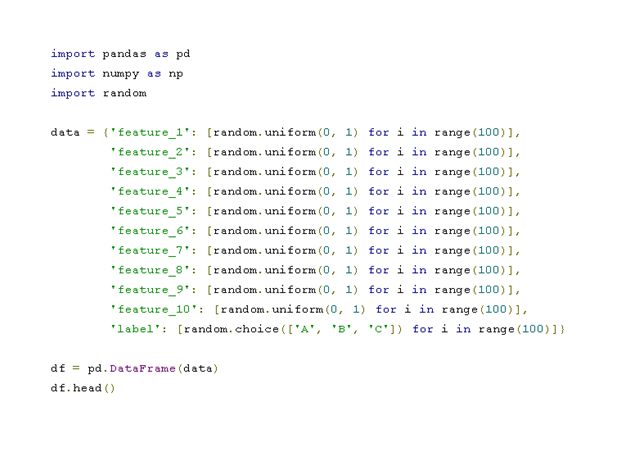

In [1]:
# Type Code Here
import pandas as pd
import numpy as np
import random

data = {'feature_1': [random.uniform(0, 1) for i in range(100)],
        'feature_2': [random.uniform(0, 1) for i in range(100)],
        'feature_3': [random.uniform(0, 1) for i in range(100)],
        'feature_4': [random.uniform(0, 1) for i in range(100)],
        'feature_5': [random.uniform(0, 1) for i in range(100)],
        'feature_6': [random.uniform(0, 1) for i in range(100)],
        'feature_7': [random.uniform(0, 1) for i in range(100)],
        'feature_8': [random.uniform(0, 1) for i in range(100)],
        'feature_9': [random.uniform(0, 1) for i in range(100)],
        'feature_10': [random.uniform(0, 1) for i in range(100)],
        'label': [random.choice(['A', 'B', 'C']) for i in range(100)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,label
0,0.752779,0.116523,0.285403,0.126700,0.226850,0.403150,0.999039,0.497233,0.479190,0.601595,B
1,0.077242,0.914896,0.022719,0.440814,0.768934,0.623196,0.908381,0.706833,0.469210,0.170762,A
2,0.978256,0.936162,0.246553,0.579777,0.811276,0.561253,0.052267,0.656939,0.026178,0.397157,A
3,0.786760,0.847082,0.658419,0.551925,0.279795,0.664427,0.593821,0.059239,0.312077,0.084349,C
4,0.837512,0.836101,0.533274,0.897393,0.552718,0.604674,0.185927,0.502004,0.727773,0.165649,C


2. Memisahkan variabel x dan variabel y

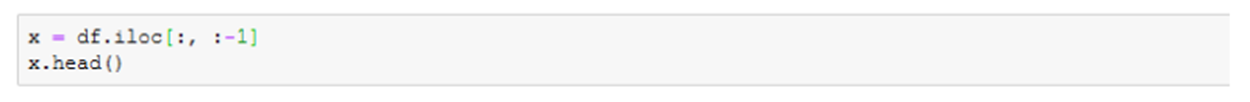



In [55]:
# Type Code Here "Fiture X"
x = df.iloc[:, :-1]
x.head()


,s_length,s_width,p_length,p_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


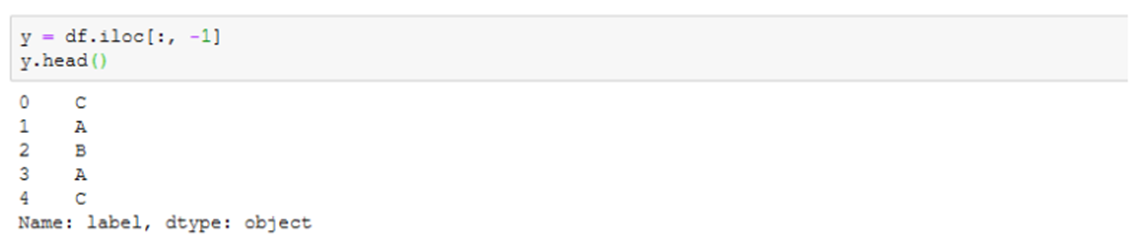

In [56]:
#type Code here "Fiture_Y"
y = df.iloc[:,-1]
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


3. Reduksi Dimensi dengan menggunakan PCA

    Import Library untuk melakukan dimensi reduksi dengan model PCA

    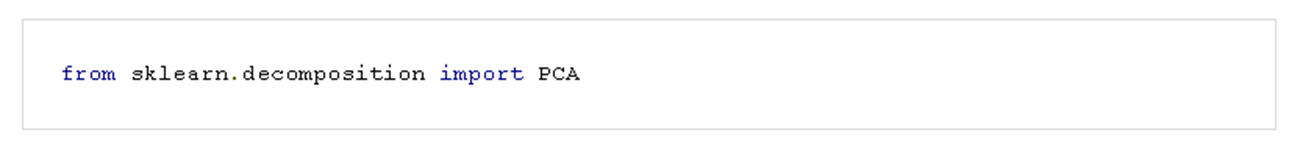

In [57]:
# Type Code Here
from sklearn.decomposition import PCA

Membuat Class PCA dengan memberikan parameter n_components yang mendefinisikan jumlah komponen atau kolom baru yang diinginkan

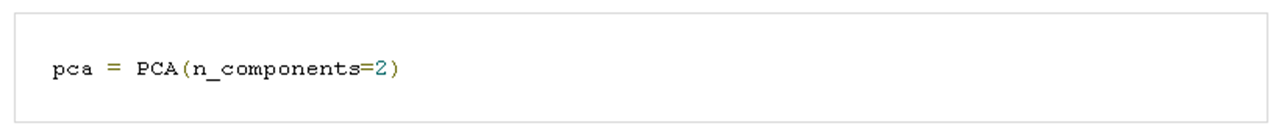

In [58]:
# type code here
pca = PCA(n_components=2)

Setelah membuat class, kita lakukan fit_transform pada data fitur. Jadi nantinya 10 kolom fitur di atas akan di proses menggunakan teknik PCA sehingga akan mengeluarkan 2 kolom baru hasil reduksi

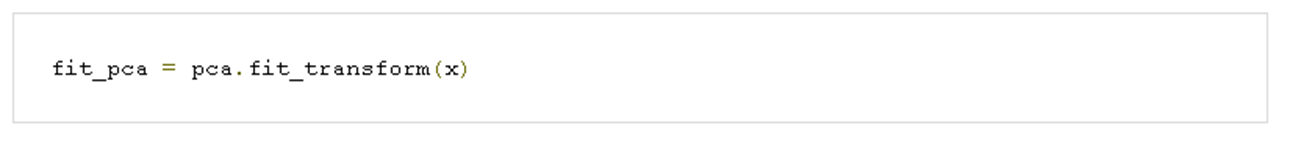

In [59]:
# Type Code Here
fit_pca = pca.fit_transform(x)

Selanjutnya membuat dataframe baru hasil fit transform tersebut

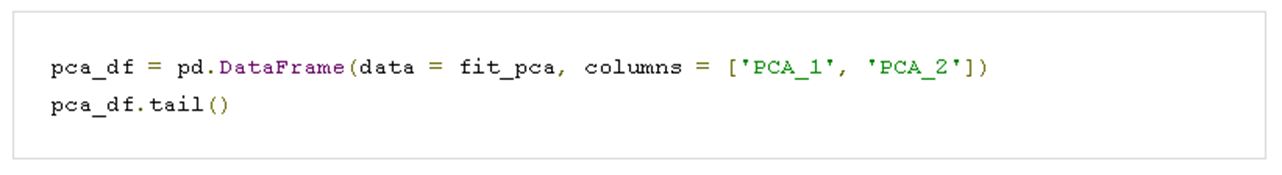

In [60]:
# Type Code Here "DataFrame_FitPCA"
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

finalDf = pd.concat([pca_df, df[['label']]], axis = 1)
finalDf.head(5)

KeyError: "None of [Index(['label'], dtype='object')] are in the [columns]"

In [62]:
# Type Code Here "DataFrame_FitPCA"
pca_df = pd.DataFrame(data = fit_pca, columns = ['PCA_1', 'PCA_2'])
pca_df.tail()

# Check if 'label' is in the columns of df
if 'label' in df.columns:
  finalDf = pd.concat([pca_df, df[['label']]], axis = 1)
else:
  # If 'label' is not in df.columns, print an informative message
  print(f"Error: 'label' column not found in DataFrame. Available columns are: {df.columns.tolist()}")
  # Optionally, handle the missing 'label' column here,
  # e.g., create a new 'label' column with default values or skip the concatenation

finalDf.head(5)

Error: 'label' column not found in DataFrame. Available columns are: ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']


,principal component 1,principal component 2,label
0,-0.120546,0.289707,B
1,-0.043204,-0.140863,A
2,0.213876,0.855370,C
3,-0.554906,0.170105,D
4,0.037102,-0.299971,B


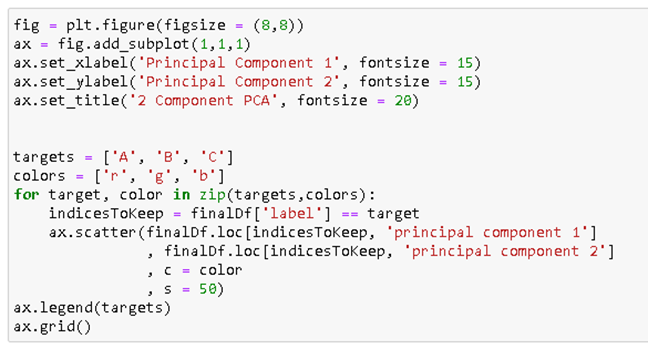

KeyError: 'PCA_1'

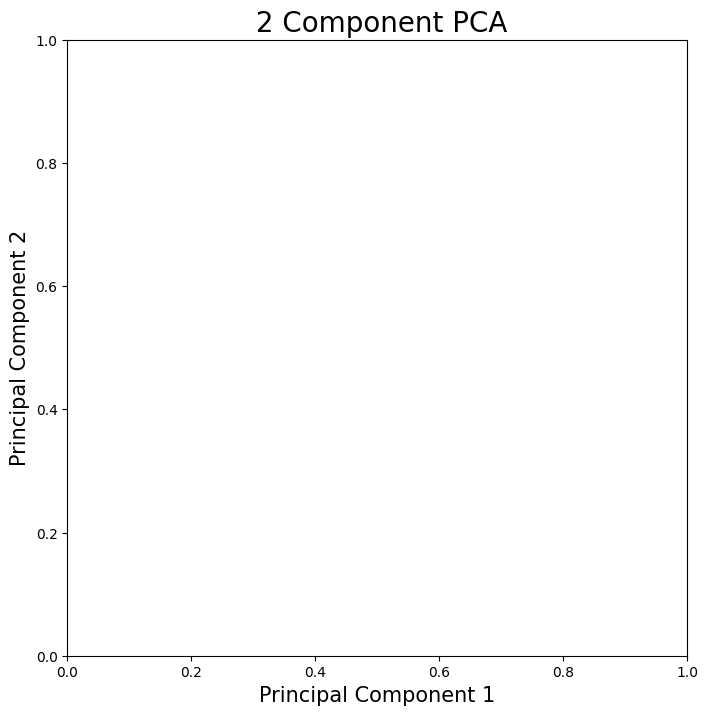

In [63]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title(' 2 Component PCA', fontsize = 20)

targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PCA_1']
             ,finalDf.loc[indicesToKeep, 'PCA_2']
             ,c = color
             , s = 50)
ax.legend(targets)
ax.grid()

Index(['principal component 1', 'principal component 2', 'label'], dtype='object')
Error: 'PCA_1' or 'PCA_2' column not found in finalDf. Please check the DataFrame creation.


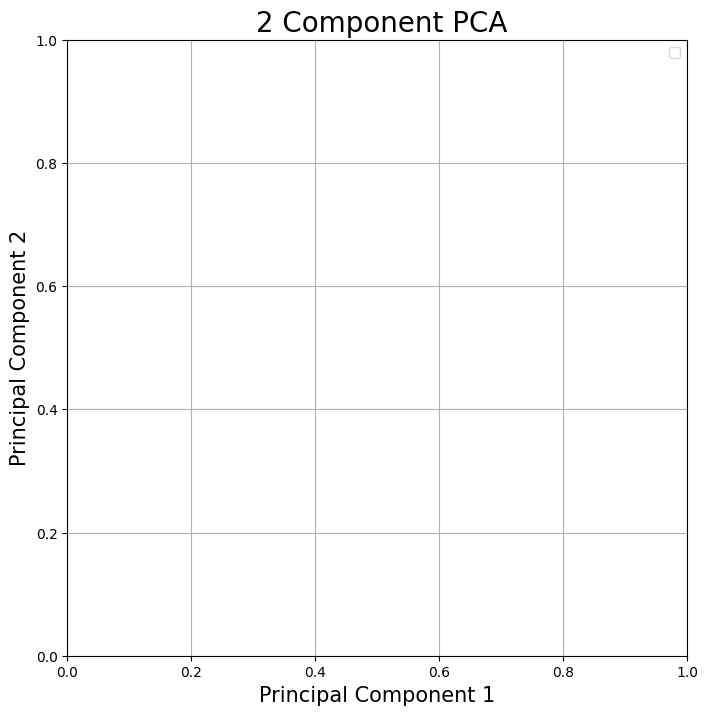

In [65]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title(' 2 Component PCA', fontsize = 20)

targets = ['A', 'B', 'C']  # Assuming these are the actual labels in your 'label' column
colors = ['r', 'g', 'b']

# Print the columns of finalDf to verify column names
print(finalDf.columns)

# Check if 'PCA_1' and 'PCA_2' are in the columns of finalDf
if 'PCA_1' not in finalDf.columns or 'PCA_2' not in finalDf.columns:
    print("Error: 'PCA_1' or 'PCA_2' column not found in finalDf. Please check the DataFrame creation.")
    # Optionally, handle the missing columns here, e.g., re-run PCA
else:
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['label'] == target

        # Access PCA columns using their actual names
        ax.scatter(finalDf.loc[indicesToKeep, 'PCA_1'],
                   finalDf.loc[indicesToKeep, 'PCA_2'],
                   c=color,
                   s=50)

ax.legend(targets)
ax.grid()

4. Reduksi Dimensi Menggunakan LDA

    Import library  Linier Discriminant Analysis (LDA)
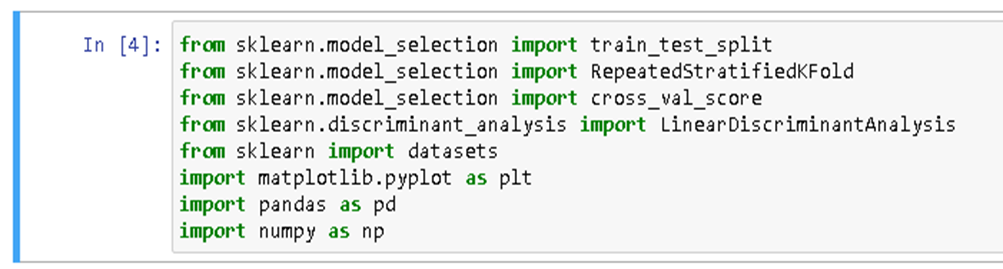

In [66]:
# Type Code Here
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Convert dataset ke model pandas dataFrame

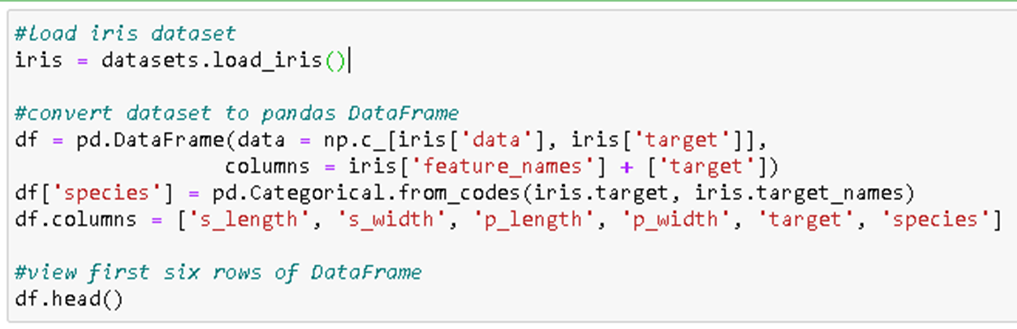

In [67]:
#Load iris dataset
iris = datasets.load_iris()

#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


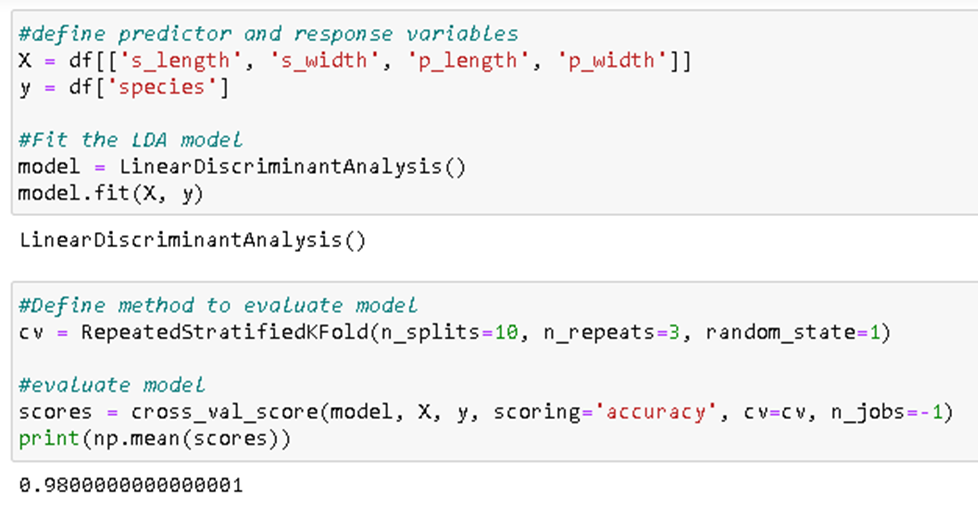

In [68]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']

#fit LDA
model = LinearDiscriminantAnalysis()
model.fit(X,y)

LinearDiscriminantAnalysis()

In [69]:
#define method evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9800000000000001


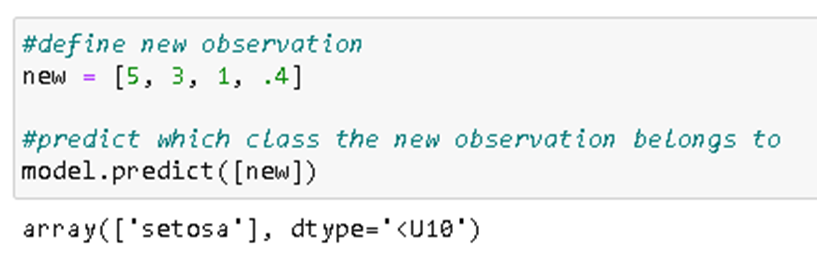

In [70]:
#define new observation
new = [5, 3, 1, .4]

#predic
model.predict([new])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['setosa'], dtype='<U10')

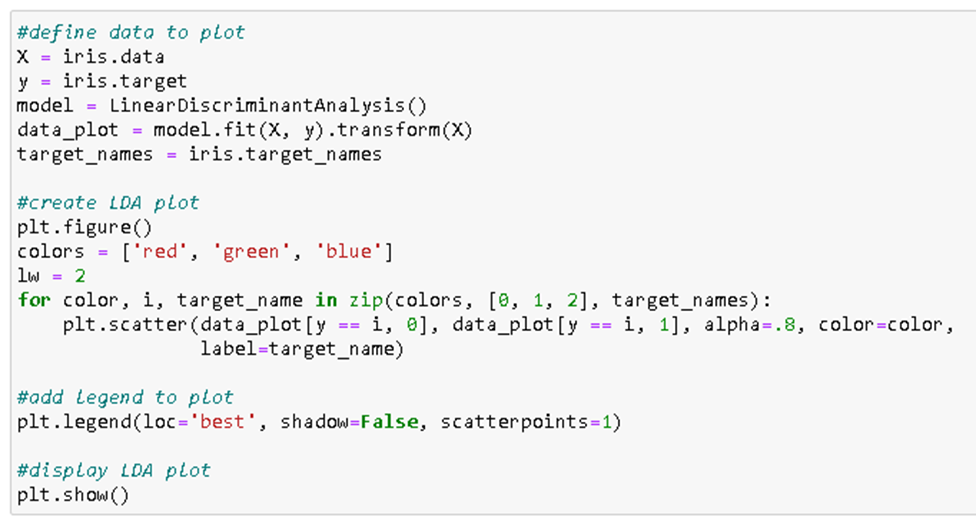

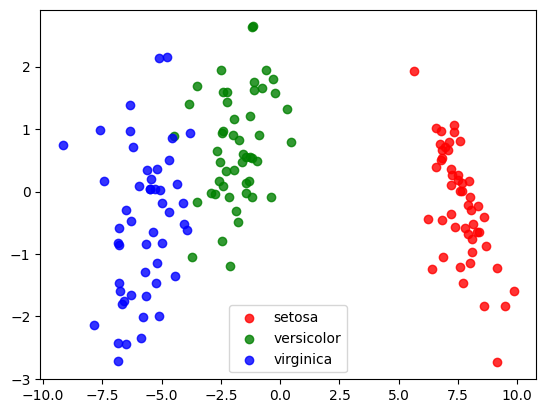

In [71]:
# define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names

#Create LDA Plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
  plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
              label=target_name)

#add legend
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()


**TUGAS KELOMPOK**

LATIHAN 1:
Membuat model data reduction dengan menggunakan PCA (Principle Componen Analysis), dengan ketentuan sebagai berikut:
1. Buatlah dataFrame dengan jumlah fiture 15
2. Generate dataFrame dengan bilangan float secara random antara 0 dan 1, serta buat n_component berjumlah 2.
3. Membuat Label A, B, C dan D (masing-masing jumlah 150 data), kemudian lanjutkan proses reduksi data model PCA sampai dengan visualisasi data dalam bentuk plot


LATIHAN 2: Membuat model data reduction dengan menggunakan LDA (Linear Discriminant Analysis) dengan ketentuan sebagai berikut;


1.   Menggunakan data dari hasil pengukuran bunga iris, silahkan download di sini: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/
2.   Tampilkan dataframe untuk variabel x dan y (data tabular). kemudian lanjutkan proses reduksi data model LDA sampai dengan visualisasi data dalam bentuk plot.





In [2]:
# code latihan 1 (PCA)
import pandas as pd
import numpy as np
import random
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
data = {'feature_1': [random.uniform(0, 1) for i in range(150)],
        'feature_2': [random.uniform(0, 1) for i in range(150)],
        'feature_3': [random.uniform(0, 1) for i in range(150)],
        'feature_4': [random.uniform(0, 1) for i in range(150)],
        'feature_5': [random.uniform(0, 1) for i in range(150)],
        'feature_6': [random.uniform(0, 1) for i in range(150)],
        'feature_7': [random.uniform(0, 1) for i in range(150)],
        'feature_8': [random.uniform(0, 1) for i in range(150)],
        'feature_9': [random.uniform(0, 1) for i in range(150)],
        'feature_10': [random.uniform(0, 1) for i in range(150)],
        'feature_11': [random.uniform(0, 1) for i in range(150)],
        'feature_12': [random.uniform(0, 1) for i in range(150)],
        'feature_13': [random.uniform(0, 1) for i in range(150)],
        'feature_14': [random.uniform(0, 1) for i in range(150)],
        'feature_15': [random.uniform(0, 1) for i in range(150)],
        'label': [random.choice(['A', 'B', 'C','D']) for i in range(150)]}

In [4]:
df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,label
0,0.001472,0.234849,0.149925,0.146071,0.767926,0.525120,0.224038,0.029272,0.903388,0.238557,0.188378,0.535263,0.655383,0.156299,0.599249,D
1,0.607935,0.779973,0.578837,0.022057,0.365157,0.347182,0.167328,0.157432,0.673462,0.018928,0.098182,0.951498,0.868144,0.336477,0.596325,B
2,0.047505,0.802231,0.461201,0.009433,0.672891,0.762934,0.929121,0.133536,0.257577,0.439012,0.143105,0.495343,0.800121,0.218190,0.746338,B
3,0.714213,0.914583,0.632926,0.911309,0.020794,0.377243,0.160922,0.407054,0.675561,0.971882,0.795796,0.587579,0.748574,0.908270,0.626663,D
4,0.170144,0.192931,0.290741,0.832345,0.627986,0.803389,0.215645,0.675729,0.834152,0.737331,0.050680,0.038801,0.417724,0.462974,0.620373,C


In [5]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10','feature_11','feature_12','feature_13','feature_14','feature_15']
x = df.loc[:, features].values

In [6]:
y = df.loc[:,['label']].values

In [7]:
pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.001472,0.234849,0.149925,0.146071,0.767926,0.525120,0.224038,0.029272,0.903388,0.238557,0.188378,0.535263,0.655383,0.156299,0.599249
1,0.607935,0.779973,0.578837,0.022057,0.365157,0.347182,0.167328,0.157432,0.673462,0.018928,0.098182,0.951498,0.868144,0.336477,0.596325
2,0.047505,0.802231,0.461201,0.009433,0.672891,0.762934,0.929121,0.133536,0.257577,0.439012,0.143105,0.495343,0.800121,0.218190,0.746338
3,0.714213,0.914583,0.632926,0.911309,0.020794,0.377243,0.160922,0.407054,0.675561,0.971882,0.795796,0.587579,0.748574,0.908270,0.626663
4,0.170144,0.192931,0.290741,0.832345,0.627986,0.803389,0.215645,0.675729,0.834152,0.737331,0.050680,0.038801,0.417724,0.462974,0.620373


In [8]:
pca = PCA(n_components=2)

In [9]:
principalComponents = pca.fit_transform(x)

In [10]:
principalComponents.shape

(150, 2)

In [11]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [12]:
principalDf.head(5)

,principal component 1,principal component 2
0,-0.495984,-0.090912
1,-0.733532,0.222196
2,-0.686302,0.277024
3,0.708844,0.260090
4,0.505807,0.105987


In [13]:
df[['label']].head()

,label
0,D
1,B
2,B
3,D
4,C


In [14]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,-0.495984,-0.090912,D
1,-0.733532,0.222196,B
2,-0.686302,0.277024,B
3,0.708844,0.260090,D
4,0.505807,0.105987,C


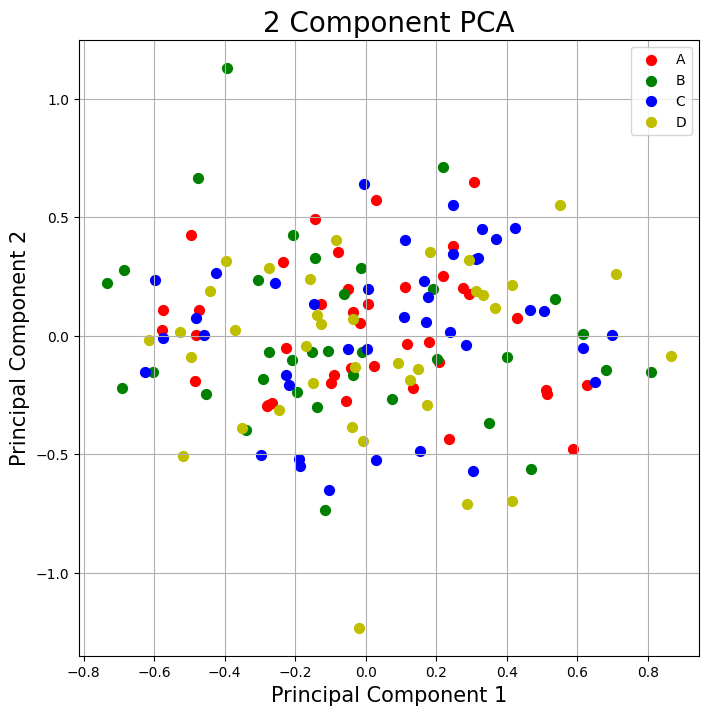

In [15]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C','D']
colors = ['r', 'g', 'b','y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [16]:
# code latihan 2 (LDA)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [17]:
#load iris dataset
iris = datasets.load_iris()
#convert dataset to pandas DataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                 columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [18]:
#find how many total observations are in dataset
len(df.index)

150

In [19]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']


#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)

LinearDiscriminantAnalysis()

In [20]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))

0.9800000000000001


In [21]:
#define new observation
new = [5, 3, 1, .4]

#predict which class the new observation belongs to
model.predict([new])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['setosa'], dtype='<U10')

In [22]:
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names


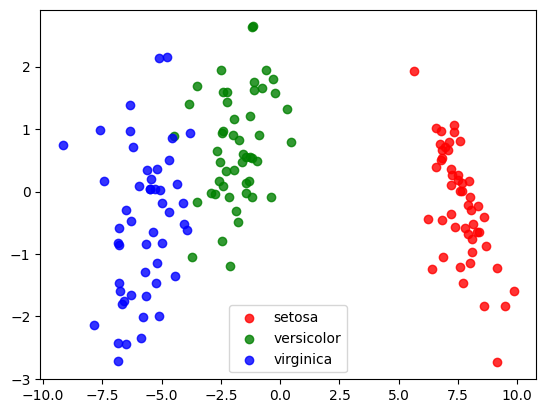

In [23]:
#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()

In [24]:

# code latihan 1 (PCA)
import pandas as pd
import numpy as np
import random

data = {'feature_1' : [random.uniform(0,1) for i in range(150)],
        'feature_2' : [random.uniform(0,1) for i in range(150)],
        'feature_3' : [random.uniform(0,1) for i in range(150)],
        'feature_4' : [random.uniform(0,1) for i in range(150)],
        'feature_5' : [random.uniform(0,1) for i in range(150)],
        'feature_6' : [random.uniform(0,1) for i in range(150)],
        'feature_7' : [random.uniform(0,1) for i in range(150)],
        'feature_8' : [random.uniform(0,1) for i in range(150)],
        'feature_9' : [random.uniform(0,1) for i in range(150)],
        'feature_10' : [random.uniform(0,1) for i in range(150)],
        'feature_11' : [random.uniform(0,1) for i in range(150)],
        'feature_12' : [random.uniform(0,1) for i in range(150)],
        'feature_13' : [random.uniform(0,1) for i in range(150)],
        'feature_14' : [random.uniform(0,1) for i in range(150)],
        'feature_15' : [random.uniform(0,1) for i in range(150)],
        'label': [random.choice(['A', 'B', 'C', 'D']) for i in range(150)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,label
0,0.711460,0.833843,0.606056,0.389660,0.540814,0.689979,0.573743,0.023119,0.247959,0.309640,0.982128,0.704230,0.578237,0.730620,0.921479,A
1,0.928328,0.757883,0.272141,0.055906,0.117713,0.717971,0.135373,0.000920,0.342897,0.248037,0.380701,0.269764,0.565561,0.407652,0.701969,C
2,0.997211,0.423031,0.865803,0.855600,0.691410,0.352170,0.335301,0.020444,0.519485,0.502232,0.653214,0.205540,0.389398,0.474548,0.779341,D
3,0.442848,0.238763,0.962583,0.556077,0.503550,0.999548,0.579849,0.805548,0.690198,0.769138,0.208824,0.498191,0.281065,0.625797,0.436156,C
4,0.011702,0.881750,0.389608,0.319048,0.103910,0.602561,0.708328,0.349760,0.621013,0.986179,0.001770,0.858263,0.414067,0.807409,0.721981,D


In [26]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
x = df.loc[:, features].values

In [25]:
y = df.loc[:,['label']].values

pd.DataFrame(data = x, columns = features).head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15
0,0.001472,0.234849,0.149925,0.146071,0.767926,0.525120,0.224038,0.029272,0.903388,0.238557,0.188378,0.535263,0.655383,0.156299,0.599249
1,0.607935,0.779973,0.578837,0.022057,0.365157,0.347182,0.167328,0.157432,0.673462,0.018928,0.098182,0.951498,0.868144,0.336477,0.596325
2,0.047505,0.802231,0.461201,0.009433,0.672891,0.762934,0.929121,0.133536,0.257577,0.439012,0.143105,0.495343,0.800121,0.218190,0.746338
3,0.714213,0.914583,0.632926,0.911309,0.020794,0.377243,0.160922,0.407054,0.675561,0.971882,0.795796,0.587579,0.748574,0.908270,0.626663
4,0.170144,0.192931,0.290741,0.832345,0.627986,0.803389,0.215645,0.675729,0.834152,0.737331,0.050680,0.038801,0.417724,0.462974,0.620373


In [27]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head(5)

,principal component 1,principal component 2
0,-0.233545,-0.417543
1,-0.205525,-0.820777
2,0.043040,0.010974
3,0.258740,0.497685
4,0.212004,-0.379220


In [28]:
df[['label']].head()

,label
0,A
1,C
2,D
3,C
4,D


In [29]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,-0.233545,-0.417543,A
1,-0.205525,-0.820777,C
2,0.043040,0.010974,D
3,0.258740,0.497685,C
4,0.212004,-0.379220,D


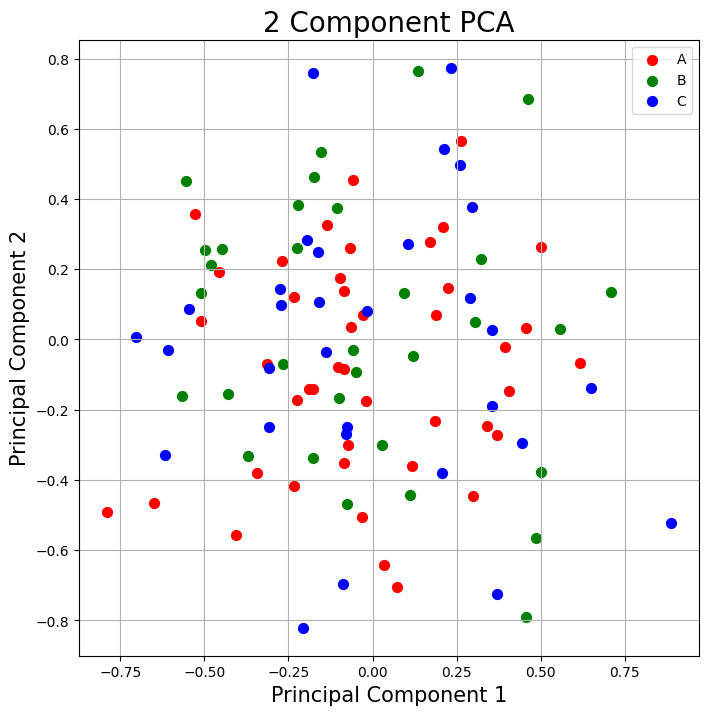

In [30]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [31]:
# code latihan 2 (LDA)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [32]:
#Load iris dataset
iris = datasets.load_iris()

#Conver dataset to pandas dataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [33]:
#find how many total observations are in dataset
len(df.index)

150

In [34]:
#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]
y = df['species']


#Fit the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X, y)


LinearDiscriminantAnalysis()

In [35]:
#Define method to evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print(np.mean(scores))


0.9800000000000001


In [36]:
#define new observation
new = [5, 3, 1, .4]

#predict which class the new observation belongs to
model.predict([new])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(


array(['setosa'], dtype='<U10')

In [37]:
#define data to plot
X = iris.data
y = iris.target
model = LinearDiscriminantAnalysis()
data_plot = model.fit(X, y).transform(X)
target_names = iris.target_names


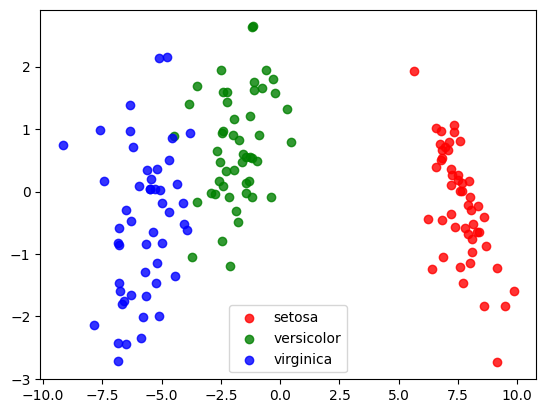

In [38]:
#create LDA plot
plt.figure()
colors = ['red', 'green', 'blue']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(data_plot[y == i, 0], data_plot[y == i, 1], alpha=.8, color=color,
                label=target_name)

#add legend to plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

#display LDA plot
plt.show()


In [39]:
# Code latihan 1 (PCA)
import pandas as pd
import numpy as np
import random

data = {'feature_1' : [random.uniform(0,1) for i in range(150)],
        'feature_2' : [random.uniform(0,1) for i in range(150)],
        'feature_3' : [random.uniform(0,1) for i in range(150)],
        'feature_4' : [random.uniform(0,1) for i in range(150)],
        'feature_5' : [random.uniform(0,1) for i in range(150)],
        'feature_6' : [random.uniform(0,1) for i in range(150)],
        'feature_7' : [random.uniform(0,1) for i in range(150)],
        'feature_8' : [random.uniform(0,1) for i in range(150)],
        'feature_9' : [random.uniform(0,1) for i in range(150)],
        'feature_10' : [random.uniform(0,1) for i in range(150)],
        'feature_11' : [random.uniform(0,1) for i in range(150)],
        'feature_12' : [random.uniform(0,1) for i in range(150)],
        'feature_13' : [random.uniform(0,1) for i in range(150)],
        'feature_14' : [random.uniform(0,1) for i in range(150)],
        'feature_15' : [random.uniform(0,1) for i in range(150)],
        'label': [random.choice(['A', 'B', 'C', 'D']) for i in range(150)]}

df = pd.DataFrame(data)
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,label
0,0.717285,0.482699,0.935884,0.661924,0.460951,0.940245,0.279818,0.196434,0.909395,0.209794,0.319785,0.005997,0.663071,0.751984,0.948708,B
1,0.308461,0.190019,0.379661,0.787741,0.485509,0.247824,0.700577,0.026893,0.437397,0.100365,0.375243,0.666865,0.218075,0.568856,0.794186,A
2,0.127447,0.426127,0.783198,0.453877,0.814302,0.965130,0.881049,0.954800,0.949101,0.220556,0.730333,0.388179,0.825733,0.110307,0.648331,C
3,0.335356,0.720641,0.298725,0.347195,0.808587,0.654851,0.229741,0.239235,0.758895,0.619606,0.835795,0.970036,0.839495,0.086012,0.130969,D
4,0.738175,0.789611,0.148308,0.326043,0.068759,0.673643,0.303743,0.744138,0.162298,0.436562,0.969515,0.456022,0.460983,0.504229,0.349761,B


In [40]:
features = ['feature_1', 'feature_2', 'feature_3', 'feature_4','feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
x = df.loc[:, features].values


In [41]:
y = df.loc[:,['label']].values

pd.DataFrame(data = x, columns = features).head()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,0.717285,0.482699,0.935884,0.661924,0.460951,0.940245,0.279818,0.196434,0.909395,0.209794
1,0.308461,0.190019,0.379661,0.787741,0.485509,0.247824,0.700577,0.026893,0.437397,0.100365
2,0.127447,0.426127,0.783198,0.453877,0.814302,0.965130,0.881049,0.954800,0.949101,0.220556
3,0.335356,0.720641,0.298725,0.347195,0.808587,0.654851,0.229741,0.239235,0.758895,0.619606
4,0.738175,0.789611,0.148308,0.326043,0.068759,0.673643,0.303743,0.744138,0.162298,0.436562


In [42]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

principalDf.head(5)

,principal component 1,principal component 2
0,-0.120546,0.289707
1,-0.043204,-0.140863
2,0.213876,0.855370
3,-0.554906,0.170105
4,0.037102,-0.299971


In [43]:
df[['label']].head()

,label
0,B
1,A
2,C
3,D
4,B


In [44]:
finalDf = pd.concat([principalDf, df[['label']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,label
0,-0.120546,0.289707,B
1,-0.043204,-0.140863,A
2,0.213876,0.855370,C
3,-0.554906,0.170105,D
4,0.037102,-0.299971,B


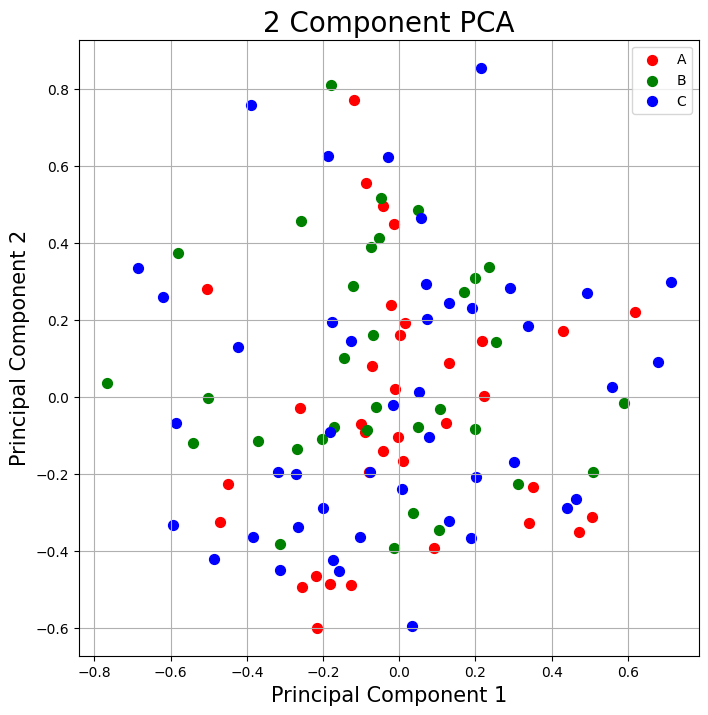

In [45]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['A', 'B', 'C']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['label'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [46]:
# Code latihan 2 (LDA)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [47]:
#Load iris dataset
iris = datasets.load_iris()

#Conver dataset to pandas dataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

,s_length,s_width,p_length,p_width,target,species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [49]:
# Code latihan 2 (LDA)
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#Load iris dataset
iris = datasets.load_iris()

#Conver dataset to pandas dataFrame
df = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                  columns = iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.columns = ['s_length', 's_width', 'p_length', 'p_width', 'target', 'species']

#view first six rows of DataFrame
df.head()

#define predictor and response variables
X = df[['s_length', 's_width', 'p_length', 'p_width']]  # Predictors (features)
y = df['target']  # Response (target)

# Verify the shape of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [50]:
#Define method to evaluate model
def evaluate_model(X, y):
    model = LinearDiscriminantAnalysis()
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores.mean(), scores.std()
mean_accuracy, std_accuracy = evaluate_model(X, y)
print(f'Mean Accuracy: {mean_accuracy:.3f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.3f}')

Mean Accuracy: 0.980
Standard Deviation of Accuracy: 0.031


In [51]:
#define new observation
new_observation = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=['s_length', 's_width', 'p_length', 'p_width'])
model = LinearDiscriminantAnalysis()
model.fit(X, y)

prediction = model.predict(new_observation)
predicted_species = iris.target_names[int(prediction[0])]

print(f'New observation: {new_observation}')
print(f'Predicted species: {predicted_species}')


New observation:    s_length  s_width  p_length  p_width
0       5.1      3.5       1.4      0.2
Predicted species: setosa


In [52]:
def evaluate_model(X, y):
    # Initialize the model (LDA in this case)
    model = LinearDiscriminantAnalysis()

    # Set up repeated stratified k-fold cross-validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

    # Evaluate model using cross-validation
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    # Return the mean and standard deviation of the cross-validation scores
    return scores.mean(), scores.std()

# Evaluate the model
mean_accuracy, std_accuracy = evaluate_model(X, y)

# Print the results
print(f'Mean Accuracy: {mean_accuracy:.3f}')
print(f'Standard Deviation of Accuracy: {std_accuracy:.3f}')


Mean Accuracy: 0.980
Standard Deviation of Accuracy: 0.031


In [53]:
#define new observation
new_observation = pd.DataFrame([[5.1, 3.5, 1.4, 0.2]], columns=['s_length', 's_width', 'p_length', 'p_width'])
model = LinearDiscriminantAnalysis()
model.fit(X, y)

prediction = model.predict(new_observation)
predicted_species = iris.target_names[int(prediction[0])]

print(f'New observation: {new_observation}')
print(f'Predicted species: {predicted_species}')

New observation:    s_length  s_width  p_length  p_width
0       5.1      3.5       1.4      0.2
Predicted species: setosa


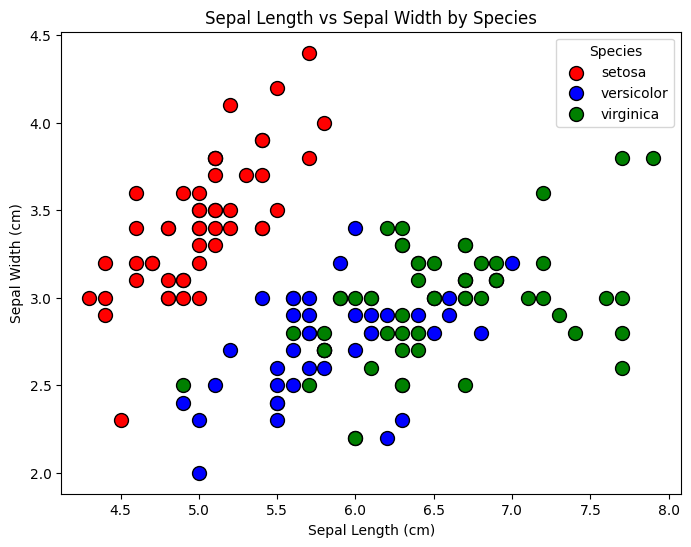

In [54]:
#define data to plot
x_data = df['s_length']  # Sepal length
y_data = df['s_width']   # Sepal width

# Define the species for coloring the points
species = df['species']

# Create a scatter plot
plt.figure(figsize=(8, 6))
colors = {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}

# Plot the data points, coloring by species
for sp in species.unique():
    plt.scatter(x_data[species == sp], y_data[species == sp],
                label=sp, color=colors[sp], edgecolor='black', s=100)

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width by Species')
plt.legend(title='Species')

# Show the plot
plt.show()